In [1]:
# Import Libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import panel as pn
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
pn.extension('plotly')
import plotly.express as px
import seaborn as sns
import nltk

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\jesus\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
load_dotenv()

True

In [3]:
api_key = os.getenv("GLASSNODE_API")
type(api_key)

str

In [4]:
# Define crypto currencies to pull
crypto_list = ["BTC"]

In [5]:
# Define Price URLs
price_url = 'https://api.glassnode.com/v1/metrics/market/price_usd'

In [6]:
# BTC Price API Request
btc_price_res = requests.get(price_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
btc_price_df = pd.read_json(btc_price_res.text, convert_dates=['t'])
btc_price_df.columns = ['Date', 'BTC Price']
btc_price_df.set_index('Date', inplace=True)

In [123]:
# ETH Price API Request
eth_price_res = requests.get(price_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
eth_price_df = pd.read_json(eth_price_res.text, convert_dates=['t'])
eth_price_df.columns = ['Date', 'ETH Price']
eth_price_df.set_index('Date', inplace=True)

In [142]:
# Dogecoin Price from CSV
doge_data_df = pd.read_csv('Plots/DOGE-USD.csv')
doge_price_df = doge_data_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
doge_price_df.rename(columns={"Close":"Doge Price"}, inplace=True)
doge_price_df.set_index('Date', inplace=True)
# doge_price_df

## BTC Data Table Debugging

In [7]:
btc_price_df.tail()

BTC Price
Date                    
2021-05-06  56485.701297
2021-05-07  57369.557999
2021-05-08  58766.584875
2021-05-09  58218.566077
2021-05-10  57497.023353

In [8]:
# Daily change in price column
btc_daily_price_pct_change = btc_price_df.pct_change(1)
btc_daily_price_pct_change.columns = ['BTC Daily Price Change %']
btc_daily_price_pct_change = btc_daily_price_pct_change.dropna()
btc_daily_price_pct_change.tail()

BTC Daily Price Change %
Date                                
2021-05-06                 -0.016340
2021-05-07                  0.015647
2021-05-08                  0.024351
2021-05-09                 -0.009325
2021-05-10                 -0.012394

In [9]:
# Define all the different data frames into a list
btc_frames = [btc_price_df, btc_daily_price_pct_change]

# Concatenate all the dataframes into one
btc_data = pd.concat(btc_frames, axis=1, join="outer", ignore_index=False)
btc_data['BTC Daily Price Change %'] = btc_data['BTC Daily Price Change %']*100
btc_data.tail()

BTC Price  BTC Daily Price Change %
Date                                              
2021-05-06  56485.701297                 -1.633994
2021-05-07  57369.557999                  1.564744
2021-05-08  58766.584875                  2.435136
2021-05-09  58218.566077                 -0.932535
2021-05-10  57497.023353                 -1.239369

## ETH Data Table Debugging

In [124]:
eth_price_df.tail()

ETH Price
Date                   
2021-05-06  3495.317281
2021-05-07  3487.489826
2021-05-08  3903.095492
2021-05-09  3932.359246
2021-05-10  4179.839702

In [144]:
# Daily change in price column
eth_daily_price_pct_change = eth_price_df.pct_change(1)
eth_daily_price_pct_change.columns = ['ETH Daily Price Change %']
eth_daily_price_pct_change = eth_daily_price_pct_change.dropna()
eth_daily_price_pct_change.tail()

ETH Daily Price Change %
Date                                
2021-05-06                 -0.007797
2021-05-07                 -0.002239
2021-05-08                  0.119170
2021-05-09                  0.007498
2021-05-10                  0.062934

In [145]:
# Define all the different data frames into a list
eth_frames = [eth_price_df, eth_daily_price_pct_change]

# Concatenate all the dataframes into one
eth_data = pd.concat(eth_frames, axis=1, join="outer", ignore_index=False)
eth_data['ETH Daily Price Change %'] = eth_data['ETH Daily Price Change %']*100
eth_data.tail()

ETH Price  ETH Daily Price Change %
Date                                             
2021-05-06  3495.317281                 -0.779665
2021-05-07  3487.489826                 -0.223941
2021-05-08  3903.095492                 11.917043
2021-05-09  3932.359246                  0.749758
2021-05-10  4179.839702                  6.293435

## Doge Data Table Debugging

In [143]:
doge_price_df.tail()

Doge Price
Date                  
2021-05-06    0.580804
2021-05-07    0.684777
2021-05-08    0.636439
2021-05-09    0.570070
2021-05-10    0.508892

In [146]:
# Daily change in price column
doge_daily_price_pct_change = doge_price_df.pct_change(1)
doge_daily_price_pct_change.columns = ['Doge Daily Price Change %']
doge_daily_price_pct_change = doge_daily_price_pct_change.dropna()
doge_daily_price_pct_change.tail()

Doge Daily Price Change %
Date                                 
2021-05-06                  -0.116827
2021-05-07                   0.179016
2021-05-08                  -0.070589
2021-05-09                  -0.104282
2021-05-10                  -0.107317

In [204]:
# Define all the different data frames into a list
doge_frames = [doge_price_df, doge_daily_price_pct_change]

# Concatenate all the dataframes into one
doge_data = pd.concat(doge_frames, axis=1, join="outer", ignore_index=False)
doge_data['Doge Daily Price Change %'] = doge_data['Doge Daily Price Change %']*100
doge_data.reset_index(inplace=True)
doge_data.columns = ['Date', 'Doge Price', 'Doge Daily Price Change %']
doge_data['Date'] = pd.to_datetime(doge_data['Date'])
doge_data.set_index('Date', inplace=True)
doge_data.tail()

Doge Price  Doge Daily Price Change %
Date                                             
2021-05-06    0.580804                 -11.682656
2021-05-07    0.684777                  17.901564
2021-05-08    0.636439                  -7.058940
2021-05-09    0.570070                 -10.428179
2021-05-10    0.508892                 -10.731665

## Get news

In [210]:
#Bitcoin news from CSV
bitcoin_df = pd.read_csv(Path('Plots/DataNews_Ethereum.csv'))
bitcoin_df['Published Date'] = pd.to_datetime(bitcoin_df['Published Date'], exact = False, infer_datetime_format=True, format = '%Y/%m%d')
for i in bitcoin_df.index:
     bitcoin_df['Published Date'][i] = bitcoin_df['Published Date'][i].date()
bitcoin_df.columns = ['Date', 'Title', 'Content']

#Ethereum news from CSV
ethereum_df = pd.read_csv(Path('Plots/DataNews_Ethereum.csv'))
ethereum_df['Published Date'] = pd.to_datetime(ethereum_df['Published Date'], exact = False, infer_datetime_format=True, format = '%Y/%m%d')
for i in ethereum_df.index:
     ethereum_df['Published Date'][i] = ethereum_df['Published Date'][i].date()
ethereum_df.columns = ['Date', 'Title', 'Content']

#Dogecoin news from CSV
dogecoin_df = pd.read_csv(Path('Plots/DataNews_Dogecoin.csv'))
dogecoin_df['Published Date'] = pd.to_datetime(dogecoin_df['Published Date'], exact = False, infer_datetime_format=True, format = '%Y/%m%d')
for i in dogecoin_df.index:
     dogecoin_df['Published Date'][i] = dogecoin_df['Published Date'][i].date()
dogecoin_df.columns = ['Date', 'Title', 'Content']

# Bitcoin Analysis

## VADER Sentiment Analysis

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [211]:
# Create function to store the sentiment scores in DataFrame
btc_sentiments = []


for i in bitcoin_df.index:
    try:
        text = bitcoin_df["Content"][i]
        date = bitcoin_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
    
        
        btc_sentiments.append({
            "text": text,
            "Date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

    
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

Date                                               text  compound  \
0  2016-05-25  The scripting language in bitcoin is restricti...   -0.3818   
1  2016-05-27  Leading bitcoin hardware mining producer Bitma...    0.0000   
2  2016-06-08  Editor’s note: The quote “It is not possible t...    0.0000   
3  2016-06-18  A Twitter post from someone claiming to be the...    0.7632   
4  2016-06-18  Following the publication of an alleged statem...   -0.7184   

   positive  negative  neutral  
0     0.000     0.066    0.934  
1     0.000     0.000    1.000  
2     0.000     0.000    1.000  
3     0.216     0.104    0.681  
4     0.048     0.149    0.803

In [212]:
# Get descriptive stats from the DataFrame
btc_df.describe()

compound     positive     negative      neutral
count  3180.000000  3180.000000  3180.000000  3180.000000
mean      0.226278     0.075744     0.030373     0.893883
std       0.424731     0.065838     0.047066     0.075499
min      -0.941300     0.000000     0.000000     0.587000
25%       0.000000     0.000000     0.000000     0.845000
50%       0.273200     0.064000     0.000000     0.899000
75%       0.571900     0.116250     0.053000     0.948000
max       0.957100     0.336000     0.337000     1.000000

In [213]:
# set Date column to index
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.set_index('Date')

In [214]:
btc_merged = pd.merge(
    btc_df,
    btc_data,
    how='inner',
    on='Date')

btc_merged.dropna()
btc_merged.tail(20)

text  compound  \
Date                                                                      
2021-05-07  Ethereum price Today – Can Pancake Swap Eclips...    0.6908   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Ethereum’s rally halted at $3,600 and declinin...   -0.5499   
2021-05-07  \n• Ethereum Classic’s hash rate has hit an al...    0.1280   
2021-05-07  It was the so-called ‘Ethereum killers’ day to...    0.4215   
2021-05-07  NEW YORK — Ethereum has outperformed major dig...   -0.2500   
2021-05-07  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-07  NEW YORK, May 7 (Reuters) - Ethereum has outpe...   -0.2500   
2021-05-07  The second-largest cryptocurrency by market ca...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – Ethereum Cryptocurrency...    0.5574   
2021-05-08  Two words sum up Mark Cuban's love for Ethereu...    0.8625   
2021-05-08  Disclaimer: The text below is a press release ...    0.0000   
2021-05-08  \n• Ethereum has a 19% chance of hitting $6k b...    0.1280   
2021-05-08  Galax (via VideoCardz) has re-released the bra...    0.0000   
2021-05-08  NEW YORK: Ethereum has outperformed major digi...   -0.2500   
2021-05-08  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-08  Ethereum Classic has surged to a new ATH of $1...    0.0000   

            positive  negative  neutral     BTC Price  \
Date                                                    
2021-05-07     0.130     0.000    0.870  57369.557999   
2021-05-07     0.083     0.000    0.917  57369.557999   
2021-05-07     0.083     0.000    0.917  57369.557999   
2021-05-07     0.000     0.115    0.885  57369.557999   
2021-05-07     0.032     0.000    0.968  57369.557999   
2021-05-07     0.062     0.000    0.938  57369.557999   
2021-05-07     0.028     0.052    0.920  57369.557999   
2021-05-07     0.028     0.052    0.920  57369.557999   
2021-05-07     0.029     0.053    0.918  57369.557999   
2021-05-07     0.000     0.000    1.000  57369.557999   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.081     0.000    0.919  58766.584875   
2021-05-08     0.190     0.000    0.810  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.040     0.030    0.929  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.029     0.053    0.918  58766.584875   
2021-05-08     0.028     0.052    0.920  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   

            BTC Daily Price Change %  
Date                                  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136

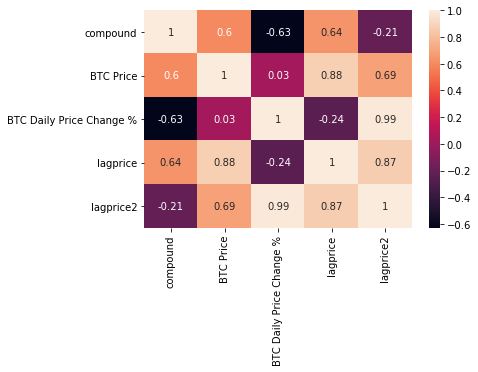

In [215]:
#set mulitple daily observations to a single mean
btc_viz = btc_merged.groupby(pd.Grouper(freq='y')).mean().dropna(how='all')

btc_corr = btc_viz.drop(columns=['positive','negative','neutral'])

btc_corr['lagprice'] = btc_corr['BTC Price'].shift(1)
btc_corr['lagprice2'] = btc_corr['BTC Price'].shift(2)

btc_heat = sns.heatmap(btc_corr.corr(), annot = True)
btc_hfig = btc_heat.get_figure()
btc_hfig.savefig('Plots/btc_heat.png')

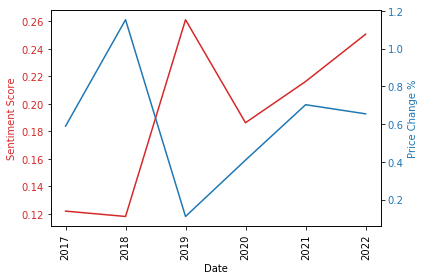

In [216]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(btc_viz['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(btc_viz['BTC Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

btc_lfig = ax2.get_figure()
btc_lfig.savefig('Plots/btc_lines.png')
plt.show()

## Build a predictive Model with Vader

In [282]:
# Add in a binary classifier for positive and negative price changes
btc_merged['target'] = np.where(btc_merged['BTC Daily Price Change %'] >= 0, 1, 0)

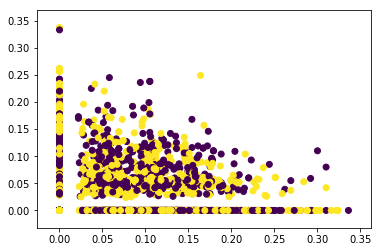

In [283]:
X = btc_merged["text"]
y = btc_merged["target"]

# Split data into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Visualize the data
btc_scatter = plt.scatter(btc_merged['positive'],btc_merged['negative'], c=y)
btc_sfig = btc_scatter.get_figure()
btc_sfig.savefig('Plots/btc_scatter.png')

In [284]:
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [285]:
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['target'].value_counts())

Train: 1788 rows and 2 columns
1    1049
0     739
Name: target, dtype: int64

Test: 795 rows and 2 columns
1    445
0    350
Name: target, dtype: int64


In [286]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(analyzer.polarity_scores).apply(pd.Series)
train.head()

text  target    neg  \
Date                                                                           
2021-05-08  Ethereum price Today – Ethereum Cryptocurrency...       1  0.000   
2021-03-20  Is it a house? Is it art? Is it merely a strin...       1  0.000   
2020-08-17  Get daily crypto briefings and weekly Bitcoin ...       1  0.035   
2020-11-21  The United Arab Emirates (UAE) is reportedly l...       1  0.039   
2020-10-03  With the large number of cryptocurrencies out ...       0  0.000   

              neu    pos  compound  
Date                                
2021-05-08  0.919  0.081    0.5574  
2021-03-20  0.961  0.039    0.2120  
2020-08-17  0.899  0.067    0.3400  
2020-11-21  0.891  0.069    0.2978  
2020-10-03  0.970  0.030    0.0772

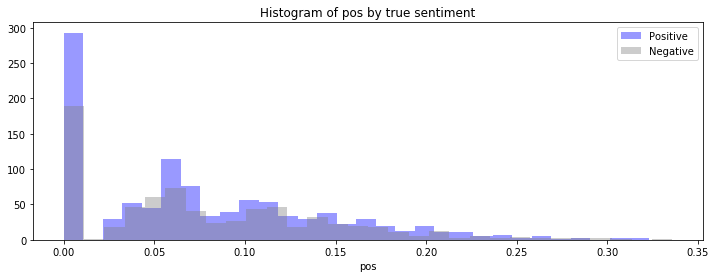

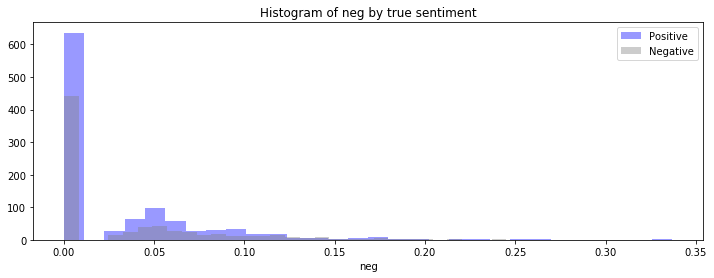

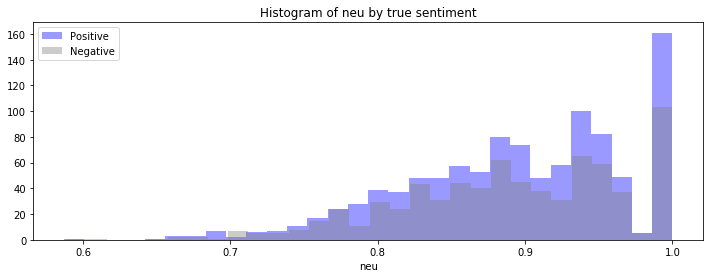

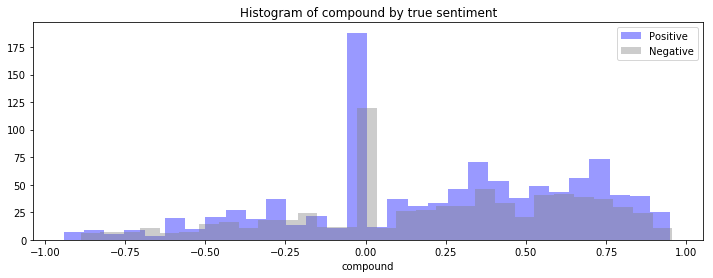

In [287]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("target==1")[var], bins=30, kde=False, 
                 color='blue', label='Positive')
    sns.distplot(train.query("target==0")[var], bins=30, kde=False, 
                 color='gray', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig("Plots/btc_"+str(var)+".png");

# Ethereum Analysis

## VADER Sentiment Analysis

In [224]:
# Create function to store the sentiment scores in DataFrame
eth_sentiments = []


for i in ethereum_df.index:
    try:
        text = ethereum_df["Content"][i]
        date = ethereum_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
    
        
        eth_sentiments.append({
            "text": text,
            "Date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

    
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

Date                                               text  compound  \
0  2016-05-25  The scripting language in bitcoin is restricti...   -0.3818   
1  2016-05-27  Leading bitcoin hardware mining producer Bitma...    0.0000   
2  2016-06-08  Editor’s note: The quote “It is not possible t...    0.0000   
3  2016-06-18  A Twitter post from someone claiming to be the...    0.7632   
4  2016-06-18  Following the publication of an alleged statem...   -0.7184   

   positive  negative  neutral  
0     0.000     0.066    0.934  
1     0.000     0.000    1.000  
2     0.000     0.000    1.000  
3     0.216     0.104    0.681  
4     0.048     0.149    0.803

In [225]:
# Get descriptive stats from the DataFrame
eth_df.describe()

compound     positive     negative      neutral
count  3180.000000  3180.000000  3180.000000  3180.000000
mean      0.226278     0.075744     0.030373     0.893883
std       0.424731     0.065838     0.047066     0.075499
min      -0.941300     0.000000     0.000000     0.587000
25%       0.000000     0.000000     0.000000     0.845000
50%       0.273200     0.064000     0.000000     0.899000
75%       0.571900     0.116250     0.053000     0.948000
max       0.957100     0.336000     0.337000     1.000000

In [226]:
# set Date column to index
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df = eth_df.set_index('Date')

In [227]:
eth_merged = pd.merge(
    eth_df,
    eth_data,
    how='inner',
    on='Date')

eth_merged.dropna()
eth_merged.tail(20)

text  compound  \
Date                                                                      
2021-05-07  Ethereum price Today – Can Pancake Swap Eclips...    0.6908   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Ethereum’s rally halted at $3,600 and declinin...   -0.5499   
2021-05-07  \n• Ethereum Classic’s hash rate has hit an al...    0.1280   
2021-05-07  It was the so-called ‘Ethereum killers’ day to...    0.4215   
2021-05-07  NEW YORK — Ethereum has outperformed major dig...   -0.2500   
2021-05-07  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-07  NEW YORK, May 7 (Reuters) - Ethereum has outpe...   -0.2500   
2021-05-07  The second-largest cryptocurrency by market ca...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – Ethereum Cryptocurrency...    0.5574   
2021-05-08  Two words sum up Mark Cuban's love for Ethereu...    0.8625   
2021-05-08  Disclaimer: The text below is a press release ...    0.0000   
2021-05-08  \n• Ethereum has a 19% chance of hitting $6k b...    0.1280   
2021-05-08  Galax (via VideoCardz) has re-released the bra...    0.0000   
2021-05-08  NEW YORK: Ethereum has outperformed major digi...   -0.2500   
2021-05-08  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-08  Ethereum Classic has surged to a new ATH of $1...    0.0000   

            positive  negative  neutral    ETH Price  ETH Daily Price Change %  
Date                                                                            
2021-05-07     0.130     0.000    0.870  3487.489826                 -0.223941  
2021-05-07     0.083     0.000    0.917  3487.489826                 -0.223941  
2021-05-07     0.083     0.000    0.917  3487.489826                 -0.223941  
2021-05-07     0.000     0.115    0.885  3487.489826                 -0.223941  
2021-05-07     0.032     0.000    0.968  3487.489826                 -0.223941  
2021-05-07     0.062     0.000    0.938  3487.489826                 -0.223941  
2021-05-07     0.028     0.052    0.920  3487.489826                 -0.223941  
2021-05-07     0.028     0.052    0.920  3487.489826                 -0.223941  
2021-05-07     0.029     0.053    0.918  3487.489826                 -0.223941  
2021-05-07     0.000     0.000    1.000  3487.489826                 -0.223941  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.081     0.000    0.919  3903.095492                 11.917043  
2021-05-08     0.190     0.000    0.810  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.040     0.030    0.929  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.029     0.053    0.918  3903.095492                 11.917043  
2021-05-08     0.028     0.052    0.920  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043

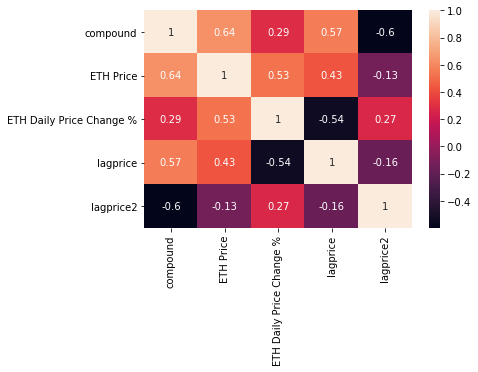

In [228]:
#set mulitple daily observations to a single mean
eth_viz = eth_merged.groupby(pd.Grouper(freq='y')).mean().dropna(how='all')

eth_corr = eth_viz.drop(columns=['positive','negative','neutral'])

eth_corr['lagprice'] = eth_corr['ETH Price'].shift(1)
eth_corr['lagprice2'] = eth_corr['ETH Price'].shift(2)

eth_heat = sns.heatmap(eth_corr.corr(), annot = True)
eth_hfig = eth_heat.get_figure()
eth_hfig.savefig('Plots/eth_heat.png')

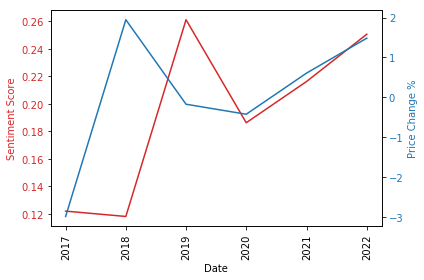

In [251]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(eth_viz['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(eth_viz['ETH Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

eth_lfig = ax2.get_figure()
eth_lfig.savefig('Plots/eth_lines.png')
plt.show()

## Build a predictive Model with Vader

In [288]:
# Add in a binary classifier for positive and negative price changes
eth_merged['target'] = np.where(eth_merged['ETH Daily Price Change %'] >= 0, 1, 0)

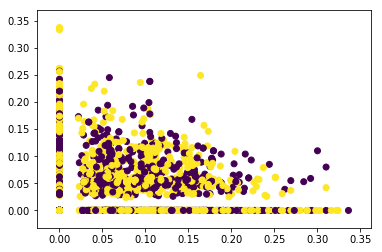

In [289]:
X = eth_merged["text"]
y = eth_merged["target"]

# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Visualize the data
eth_scatter = plt.scatter(eth_merged['positive'],eth_merged['negative'], c=y)
eth_sfig = eth_scatter.get_figure()
eth_sfig.savefig('Plots/eth_scatter.png')

In [290]:
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [291]:
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['target'].value_counts())

Train: 1788 rows and 2 columns
1    1059
0     729
Name: target, dtype: int64

Test: 795 rows and 2 columns
1    470
0    325
Name: target, dtype: int64


In [292]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(analyzer.polarity_scores).apply(pd.Series)
train.head()

text  target  neg  \
Date                                                                         
2021-03-10  Two years after announcing the general availab...       0  0.0   
2021-01-12  \n• Ethereum has been closely tracking Bitcoin...       0  0.0   
2021-02-09  A representation of the Ethereum virtual curre...       1  0.0   
2021-01-20  Ether (ETH), the second-biggest cryptocurrency...       1  0.0   
2021-04-27  Bitcoin and crypto-mining monolith Bitmain is ...       1  0.0   

              neu    pos  compound  
Date                                
2021-03-10  0.837  0.163    0.7003  
2021-01-12  0.969  0.031    0.0772  
2021-02-09  1.000  0.000    0.0000  
2021-01-20  0.950  0.050    0.2732  
2021-04-27  1.000  0.000    0.0000

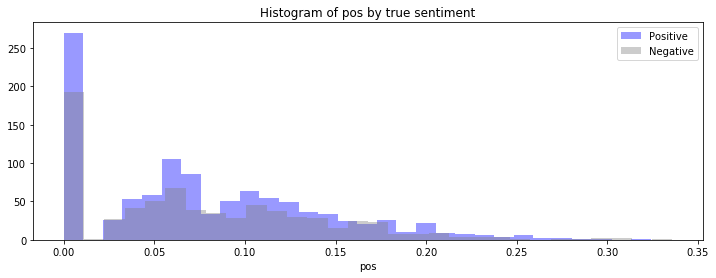

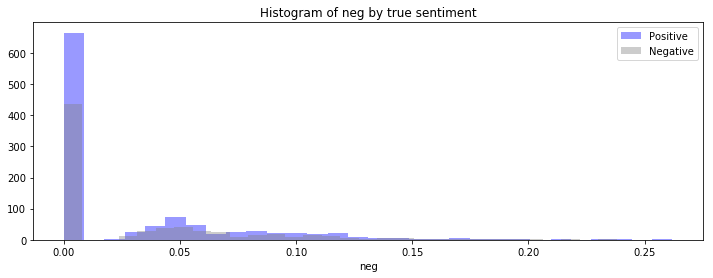

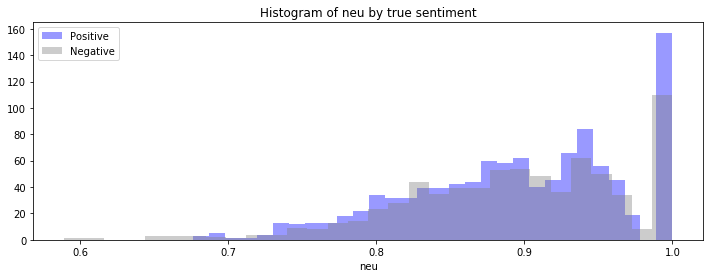

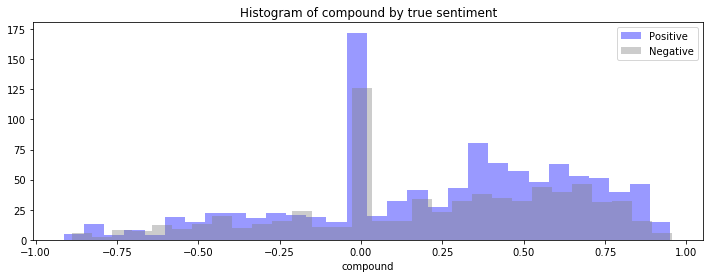

In [293]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("target==1")[var], bins=30, kde=False, 
                 color='blue', label='Positive')
    sns.distplot(train.query("target==0")[var], bins=30, kde=False, 
                 color='gray', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig("Plots/eth_"+str(var)+".png");

# Dogecoin Analysis

## VADER Sentiment Analysis

In [239]:
# Create function to store the sentiment scores in DataFrame
doge_sentiments = []


for i in dogecoin_df.index:
    try:
        text = dogecoin_df["Content"][i]
        date = dogecoin_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
    
        
        doge_sentiments.append({
            "text": text,
            "Date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

    
    
# Create DataFrame
doge_df = pd.DataFrame(doge_sentiments)

# Reorder DataFrame columns
cols = ["Date", "text", "compound", "positive", "negative", "neutral"]
doge_df = doge_df[cols]

doge_df.head()

Date                                               text  compound  \
0  2017-09-15  Jackson Palmer, creator of Dogecoin, in San Fr...   -0.6059   
1  2017-11-08  The controversial SegWit2x fork has been suspe...   -0.7351   
2  2018-01-25  Messaging app Telegram started out as a WhatsA...   -0.5023   
3  2018-10-20  The startup is behind the Emma app for iOS and...    0.5859   
4  2019-04-25  By CCN: As bitcoin’s price experienced a surge...    0.8070   

   positive  negative  neutral  
0     0.098     0.169    0.733  
1     0.000     0.163    0.837  
2     0.000     0.083    0.917  
3     0.148     0.047    0.805  
4     0.175     0.000    0.825

In [240]:
# Get descriptive stats from the DataFrame
doge_df.describe()

compound     positive     negative      neutral
count  1320.000000  1320.000000  1320.000000  1320.000000
mean      0.263925     0.079610     0.027657     0.892736
std       0.417506     0.070063     0.044600     0.078820
min      -0.888500     0.000000     0.000000     0.563000
25%       0.000000     0.000000     0.000000     0.842000
50%       0.327500     0.065000     0.000000     0.901000
75%       0.612400     0.121000     0.048000     0.949000
max       0.979600     0.437000     0.262000     1.000000

In [241]:
# set Date column to index
doge_df['Date'] = pd.to_datetime(doge_df['Date'])
doge_df = doge_df.set_index('Date')

In [242]:
doge_merged = pd.merge(
    doge_df,
    doge_data,
    how='inner',
    on='Date')

doge_merged.dropna()
doge_merged.tail(20)

text  compound  \
Date                                                                      
2021-05-07  now Make the most of your money by signing up ...    0.0000   
2021-05-07  now Make the most of your money by signing up ...    0.0000   
2021-05-07  Dogecoin has made several attempts to settle b...    0.8658   
2021-05-07  WEST PALM BEACH, Fla. — Your social media feed...    0.5584   
2021-05-07  Get daily crypto briefings and weekly Bitcoin ...    0.0000   
2021-05-07  Dogecoin slid by 11.15% on Thursday. Reversing...    0.4215   
2021-05-07  Falling short of the first major resistance le...   -0.2023   
2021-05-07  Dogecoin surged by 22% on 5th May to record a ...    0.1901   
2021-05-07  WEST PALM BEACH, Fla. — Your social media feed...    0.5584   
2021-05-07  “I’m just a dude,” Jasyn Prolifiq said. Prolif...    0.5719   
2021-05-08  Dogecoin is reaching all new levels, but the q...    0.9070   
2021-05-08  Dogecoin investors remain curious of a “whale”...   -0.4215   
2021-05-08  Dogecoin — the meme-based cryptocurrency — is ...    0.6908   
2021-05-08  \n• Dogecoin (DOGE) recently hit over an $85 b...    0.0000   
2021-05-08  Maybe your friends or co-workers are telling y...    0.3197   
2021-05-08  Dogecoin (DOGE) now has an impressive market c...    0.5106   
2021-05-08  Elon Musk has urged people to take “caution” w...    0.4588   
2021-05-08  \n• Dogecoin's spectacular rise this year has ...    0.0772   
2021-05-08  The cryptocurrency fell almost 8% in the past ...    0.5267   
2021-05-08  The cryptocurrency fell almost 8% in the past ...    0.5267   

            positive  negative  neutral  Doge Price  Doge Daily Price Change %  
Date                                                                            
2021-05-07     0.000     0.000    1.000    0.684777                  17.901564  
2021-05-07     0.000     0.000    1.000    0.684777                  17.901564  
2021-05-07     0.195     0.000    0.805    0.684777                  17.901564  
2021-05-07     0.117     0.047    0.837    0.684777                  17.901564  
2021-05-07     0.115     0.094    0.791    0.684777                  17.901564  
2021-05-07     0.072     0.034    0.894    0.684777                  17.901564  
2021-05-07     0.101     0.135    0.763    0.684777                  17.901564  
2021-05-07     0.036     0.000    0.964    0.684777                  17.901564  
2021-05-07     0.117     0.047    0.837    0.684777                  17.901564  
2021-05-07     0.078     0.000    0.922    0.684777                  17.901564  
2021-05-08     0.236     0.000    0.764    0.636439                  -7.058940  
2021-05-08     0.049     0.108    0.844    0.636439                  -7.058940  
2021-05-08     0.157     0.000    0.843    0.636439                  -7.058940  
2021-05-08     0.000     0.000    1.000    0.636439                  -7.058940  
2021-05-08     0.112     0.087    0.801    0.636439                  -7.058940  
2021-05-08     0.078     0.000    0.922    0.636439                  -7.058940  
2021-05-08     0.068     0.000    0.932    0.636439                  -7.058940  
2021-05-08     0.056     0.049    0.894    0.636439                  -7.058940  
2021-05-08     0.067     0.000    0.933    0.636439                  -7.058940  
2021-05-08     0.067     0.000    0.933    0.636439                  -7.058940

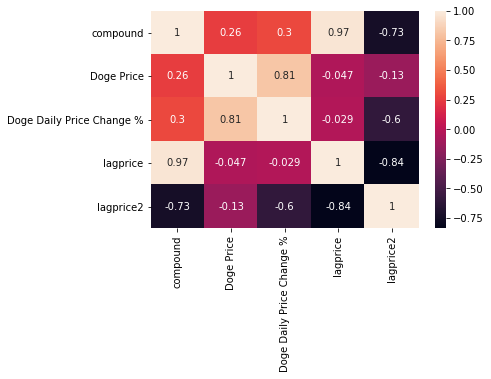

In [243]:
#set mulitple daily observations to a single mean
doge_viz = doge_merged.groupby(pd.Grouper(freq='y')).mean().dropna(how='all')

doge_corr = doge_viz.drop(columns=['positive','negative','neutral'])

doge_corr['lagprice'] = doge_corr['Doge Price'].shift(1)
doge_corr['lagprice2'] = doge_corr['Doge Price'].shift(2)

doge_heat = sns.heatmap(doge_corr.corr(), annot = True)
doge_hfig = doge_heat.get_figure()
doge_hfig.savefig('Plots/doge_heat.png')

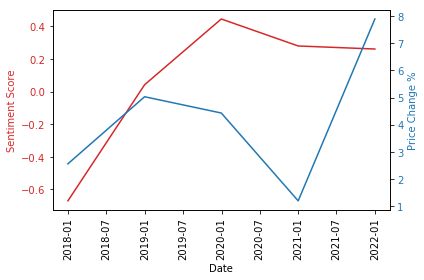

In [254]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(doge_viz['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(doge_viz['Doge Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

doge_lfig = ax2.get_figure()
doge_lfig.savefig('Plots/doge_lines.png')
plt.show()

## Build a predictive Model with Vader

In [294]:
# Add in a binary classifier for positive and negative price changes
doge_merged['target'] = np.where(doge_merged['Doge Daily Price Change %'] >= 0, 1, 0)

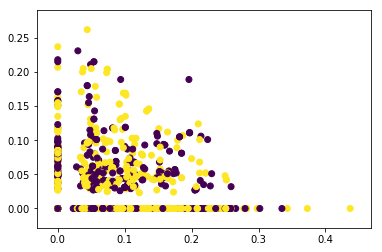

In [295]:
X = doge_merged["text"]
y = doge_merged["target"]

# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Visualize the data
doge_scatter = plt.scatter(doge_merged['positive'],doge_merged['negative'], c=y)
doge_sfig = doge_scatter.get_figure()
doge_sfig.savefig('Plots/doge_scatter.png')

In [278]:
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [279]:
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['target'].value_counts())

Train: 742 rows and 2 columns
1    396
0    346
Name: target, dtype: int64

Test: 330 rows and 2 columns
0    169
1    161
Name: target, dtype: int64


In [280]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(analyzer.polarity_scores).apply(pd.Series)
train.head()

text  target    neg  \
Date                                                                           
2021-05-07  WEST PALM BEACH, Fla. — Your social media feed...       1  0.047   
2020-09-12  Cryptocurrency ATMs Market 2018: Global Indust...       1  0.000   
2021-02-03  Bitcoin and the broader cryptocurrency market ...       1  0.035   
2021-03-29  Le PDG de Tesla, Elon Musk, a supprimé vendred...       1  0.000   
2020-12-20  Shaking up a calm weekend in his inimitable st...       1  0.106   

              neu    pos  compound  
Date                                
2021-05-07  0.837  0.117    0.5584  
2020-09-12  0.868  0.132    0.6124  
2021-02-03  0.925  0.040    0.0516  
2021-03-29  1.000  0.000    0.0000  
2020-12-20  0.844  0.050   -0.3818

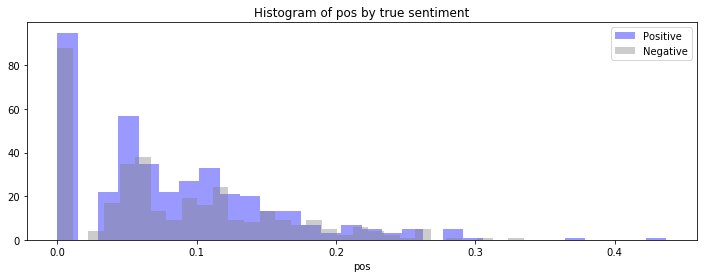

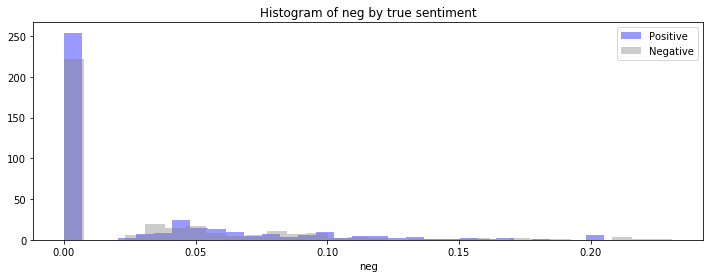

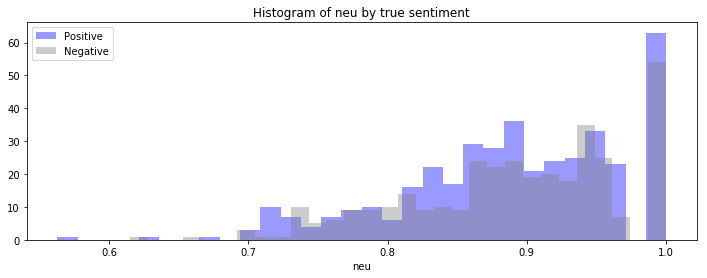

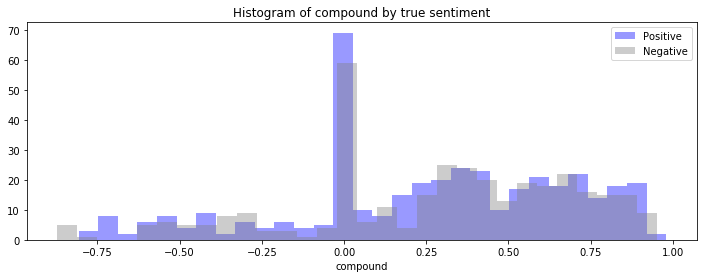

In [281]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("target==1")[var], bins=30, kde=False, 
                 color='blue', label='Positive')
    sns.distplot(train.query("target==0")[var], bins=30, kde=False, 
                 color='gray', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig("Plots/doge_"+str(var)+".png");

# Crude Dashboard

In [80]:
import panel as pn
from panel.interact import interact
from IPython.display import Image
from IPython.core.display import HTML
import param

In [302]:
#Dictionaries for plot storing
#Each dictionary stores a different type of plot
heat_dict = [
    {'Crypto':'BTC','Heat':Image(filename='Plots/btc_heat.png')},
    {'Crypto':'ETH','Heat':Image(filename='Plots/eth_heat.png')},
    {'Crypto':'Doge', 'Heat':Image(filename='Plots/doge_heat.png')}
]

lines_dict = [
    {'Crypto':'BTC','Line':Image(filename='Plots/btc_lines.png')},
    {'Crypto':'ETH','Line':Image(filename='Plots/eth_lines.png')},
    {'Crypto':'Doge', 'Line':Image(filename='Plots/doge_lines.png')}
]

scatter_dict = [
    {'Crypto':'BTC','Scatter':Image(filename='Plots/btc_scatter.png')},
    {'Crypto':'ETH','Scatter':Image(filename='Plots/eth_scatter.png')},
    {'Crypto':'Doge', 'Scatter':Image(filename='Plots/doge_scatter.png')}
]

pos_dict = [
    {'Crypto':'BTC','Pos':Image(filename='Plots/btc_pos.png')},
    {'Crypto':'ETH','Pos':Image(filename='Plots/eth_pos.png')},
    {'Crypto':'Doge', 'Pos':Image(filename='Plots/doge_pos.png')}
]

neu_dict = [
    {'Crypto':'BTC','Neu':Image(filename='Plots/btc_neu.png')},
    {'Crypto':'ETH','Neu':Image(filename='Plots/eth_neu.png')},
    {'Crypto':'Doge', 'Neu':Image(filename='Plots/doge_neu.png')}
]

neg_dict = [
    {'Crypto':'BTC','Neg':Image(filename='Plots/btc_neg.png')},
    {'Crypto':'ETH','Neg':Image(filename='Plots/eth_neg.png')},
    {'Crypto':'Doge', 'Neg':Image(filename='Plots/doge_neg.png')}
]

comp_dict = [
    {'Crypto':'BTC','Comp':Image(filename='Plots/btc_compound.png')},
    {'Crypto':'ETH','Comp':Image(filename='Plots/eth_compound.png')},
    {'Crypto':'Doge', 'Comp':Image(filename='Plots/doge_compound.png')}
]

In [303]:
#Dashboard construction
dash_df = pd.DataFrame(
    [['BTC'], 
     ['ETH'], 
     ['Doge']], 
     columns=['Crypto']
)
dash_df

# Class containing dropdown menu for cryptos, relevant plots and dataframes
class CryptoDashboard(param.Parameterized):
    
    #Crypto dropdown selector
    Crypto = param.ObjectSelector(default='BTC', objects=list(dash_df.Crypto.unique()))
    
    def rel_data(self):
        crypto_data = dash_df[(dash_df.Crypto==self.Crypto)].copy()
        return crypto_data

    def heat_plot(self):
        data= self.rel_data()
        for dict in heat_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    hmap=dict["Heat"]
        return hmap
    
    def line_plot(self):
        data= self.rel_data()
        for dict in lines_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    line=dict["Line"]
        return line
    
    def scatter_plot(self):
        data= self.rel_data()
        for dict in scatter_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    line=dict["Scatter"]
        return line
    
    def pos_hist(self):
        data= self.rel_data()
        for dict in pos_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    line=dict["Pos"]
        return line
    def neu_hist(self):
        data= self.rel_data()
        for dict in neu_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    line=dict["Neu"]
        return line
    def neg_hist(self):
        data= self.rel_data()
        for dict in neg_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    line=dict["Neg"]
        return line
    def comp_hist(self):
        data= self.rel_data()
        for dict in comp_dict:
            for k,v in dict.items():
                if v == self.Crypto:
                    line=dict["Comp"]
        return line

In [304]:
CD = CryptoDashboard()

In [311]:
#Dashboard elements
dash_title = "# NLP-Crypto-Project"

#Dashboard description
dash_desc = " Our project aims to examine the relationship between public sentiment indicators and the prices of various cryptocurrencies. Sentiment is gathered from different news sources and run through VADER and LSTM"

#Placing histograms in a row
hist_row = pn.Tabs(
    ("Positive", CD.pos_hist), 
    ("Neutral", CD.neu_hist), 
    ("Negative", CD.neg_hist), 
    ("Compound", CD.comp_hist)
)

#Dashboard construction
dashboard = pn.Column(
    dash_title,
    dash_desc,
    CD.param,
    "## Heatmap",
    CD.heat_plot,
    "## Line Plot",
    CD.line_plot,
    "## Scatter Plot",
    CD.scatter_plot,
    "## Histograms",
    hist_row,
)


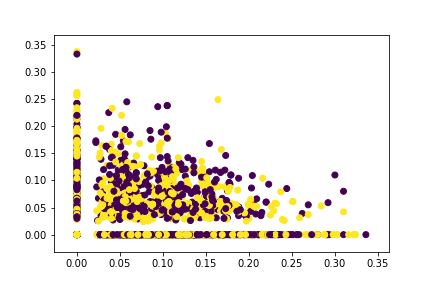
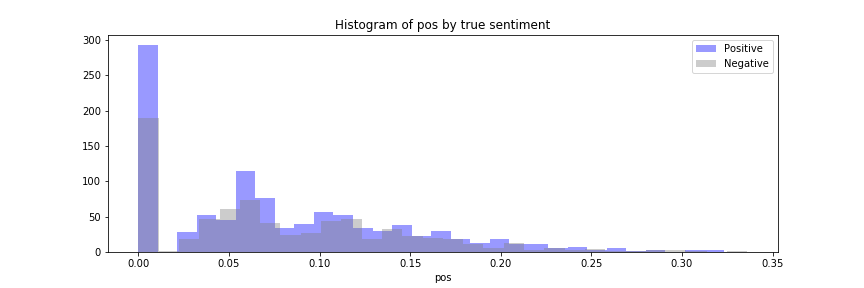
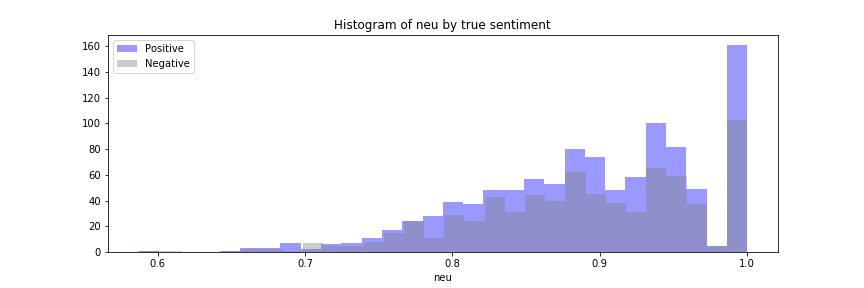
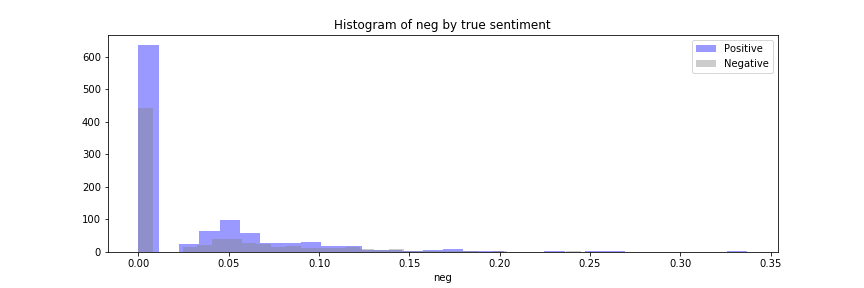
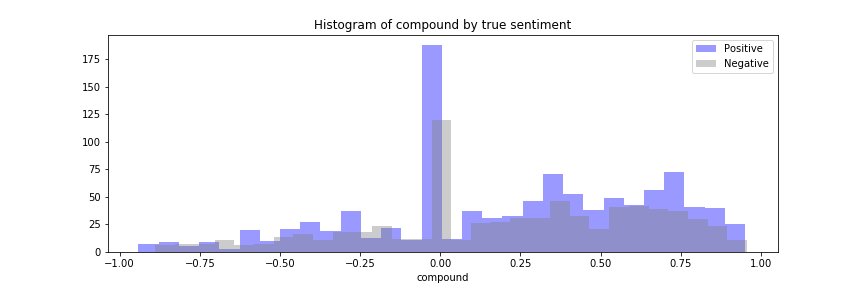
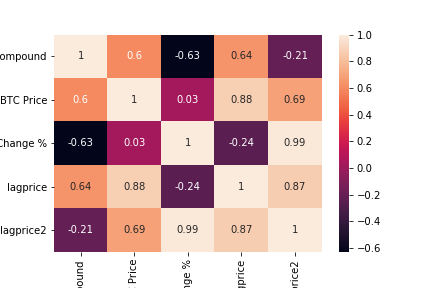
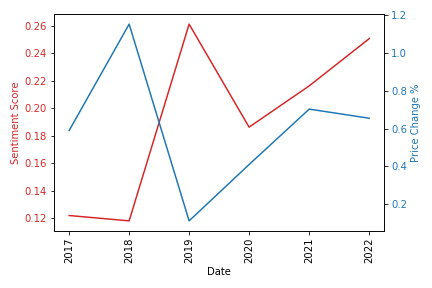
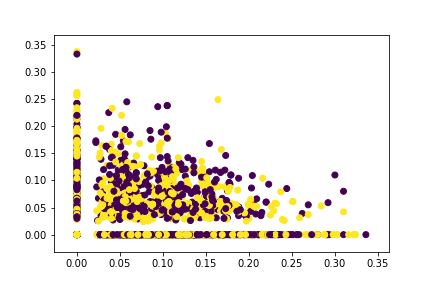
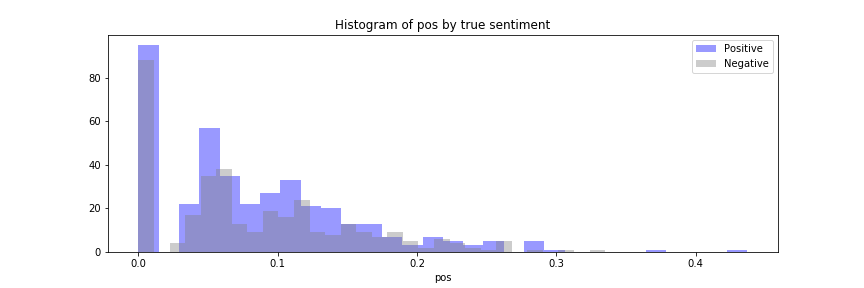
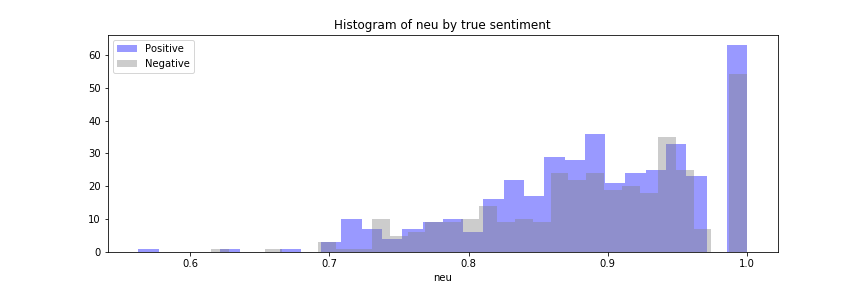
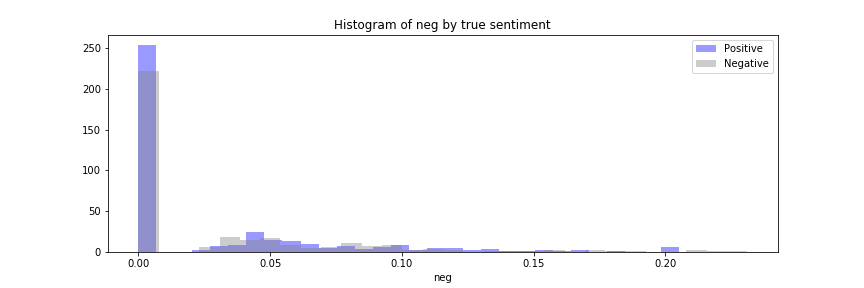
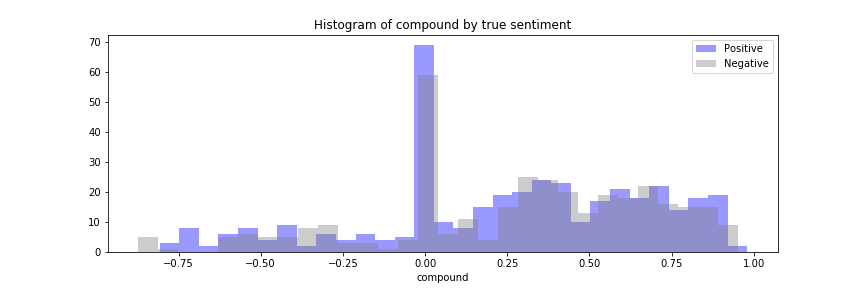
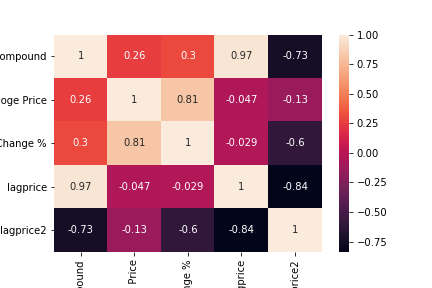
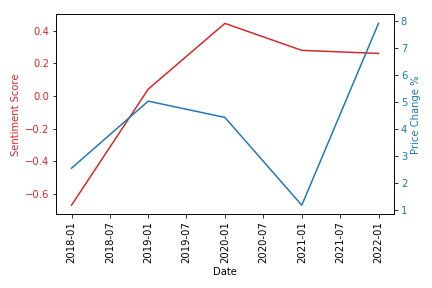
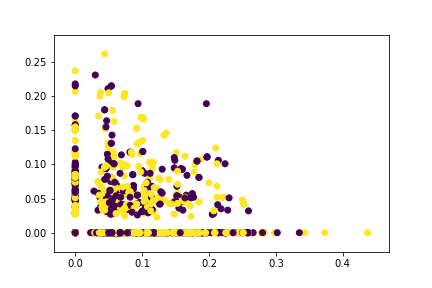
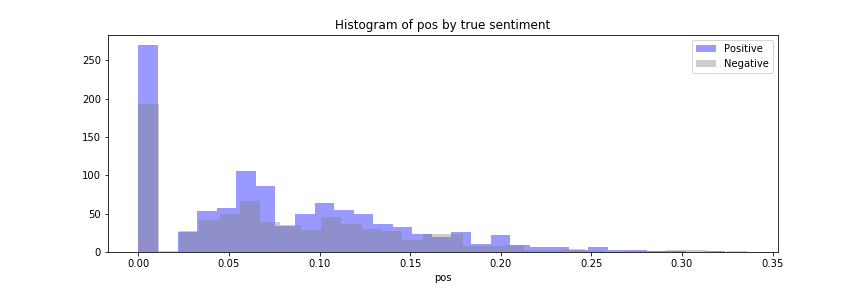
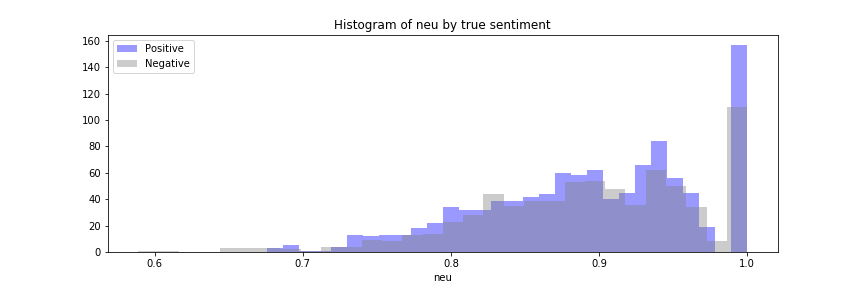
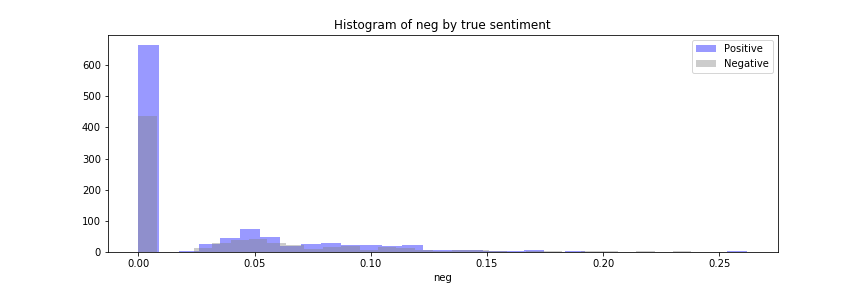
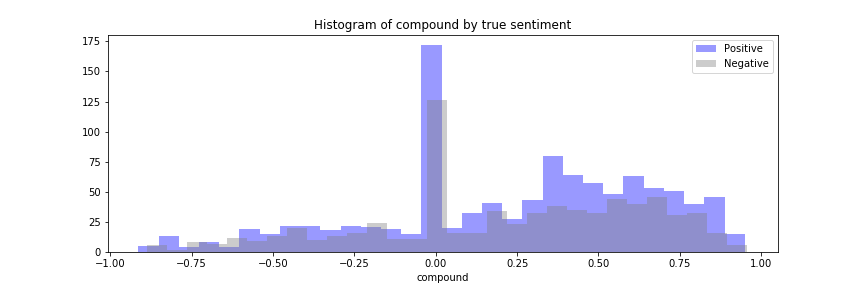
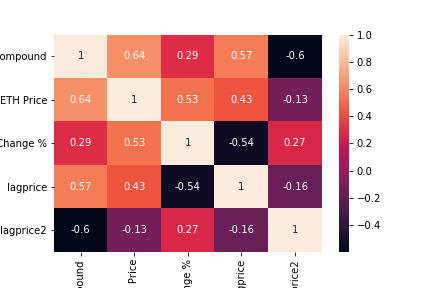
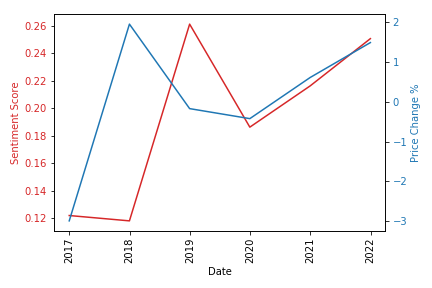
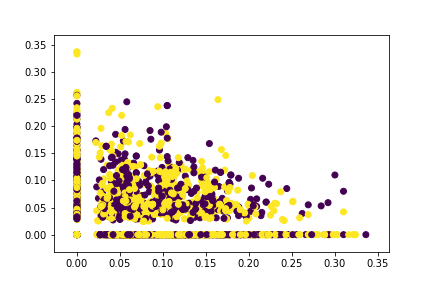
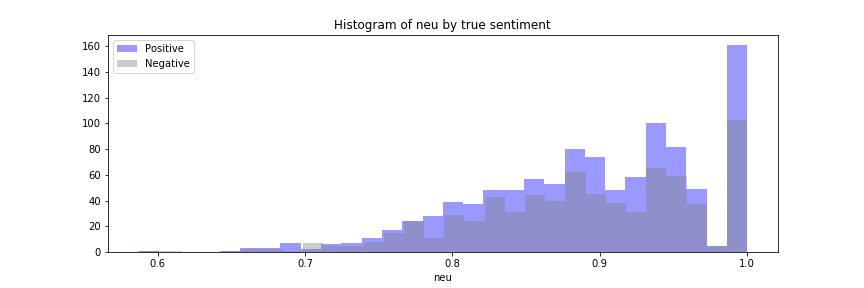
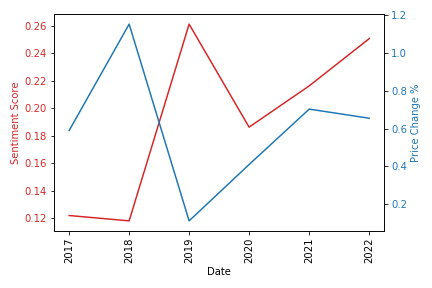
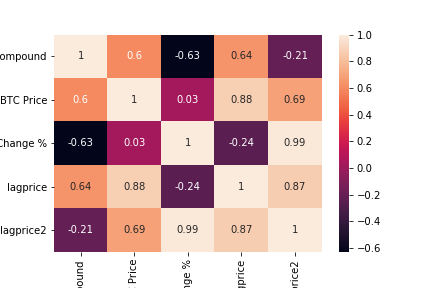
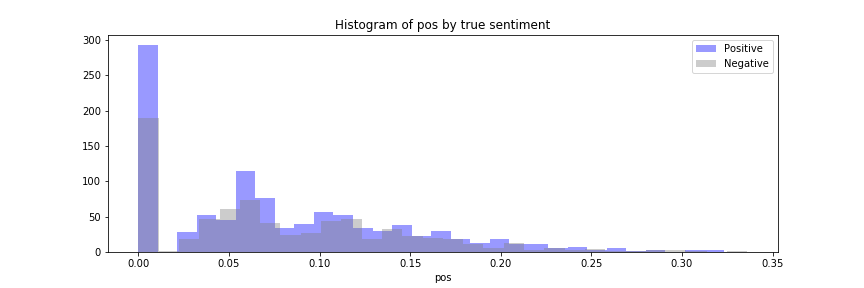
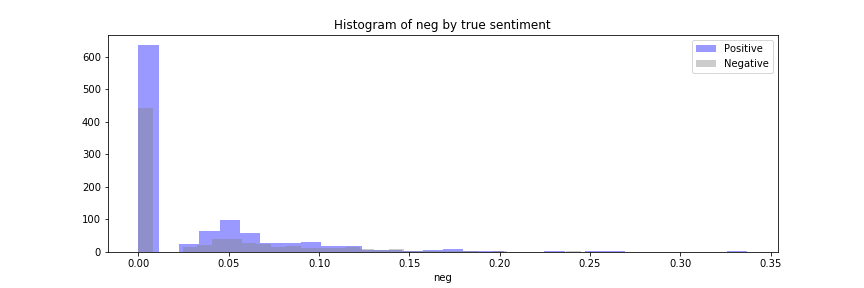
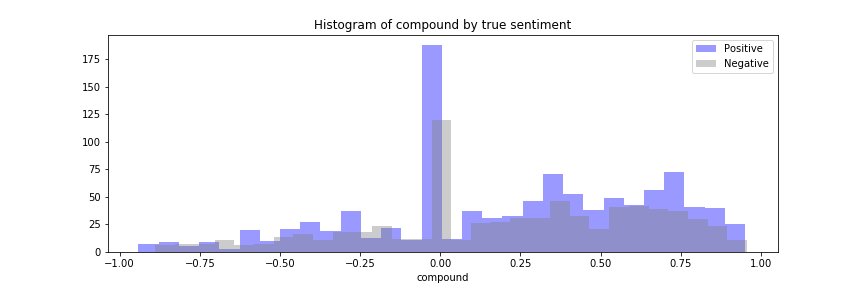

In [312]:
dashboard.embed()